In [1]:
# from warnings import filterwarnings
# filterwarnings("ignore", category=UserWarning)
# filterwarnings("ignore", category=DeprecationWarning)

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 $('div.prompt').hide();
 } else {
 $('div.input').show();
$('div.prompt').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Code Toggle"></form>''')

In [2]:
from IPython.display import HTML

HTML('''
<a href="{{ site.links.github }}/raw/nist-pages/benchmarks/benchmark1.ipynb"
   download>
<button type="submit">Download Notebook</button>
</a>
''')

# Benchmark Problem 1:  Spinodal Decomposition

In [3]:
from IPython.display import HTML

HTML('''{% include jupyter_benchmark_table.html num="[1]" revision=1 %}''')

 
 * [Overview](#Overview)
 * [Free energy and dynamics](#Free-energy-and-dynamics)
    * [Figure 1: free energy density](#Figure-1:-free-energy-density)
 * [Parameter values](#Parameter-values)
 * [Domain geometries and boundary conditions](#Domain-geometries-and-boundary-conditions)
	* [(a) Square periodic](#%28a%29-Square-periodic)
	* [(b) Square no-flux](#%28b%29-Square-no-flux)
	* [(c) T-shape](#%28c%29-T-shape)
	* [(d) Sphere](#%28d%29-Sphere)
 * [Initial conditions](#Initial-conditions)
	* [Initial conditions for (a), (b) and (c)](#Initial-conditions-for-%28a%29,-%28b%29-and-%28c%29)
       * [Figure 2: initial $c$ for (a), (b) and (c)](#Figure-2:-initial-$c$-for-%28a%29,-%28b%29-and-%28c%29)
	* [Initial conditions for (d)](#Initial-conditions-for-%28d%29)
       * [Figure 3: initial $c$ for (d)](#Figure-3:-initial-$c$-for-%28d%29)
 * [Submission Guidelines](#Submission-Guidelines)
 * [Results](#Results)


See the journal publication entitled ["Benchmark problems for numerical implementations of phase field models"][benchmark_paper] for more details about the benchmark problems. Furthermore, read [the extended essay][benchmarks] for a discussion about the need for benchmark problems.

[benchmarks]: ../
[benchmark_paper]: http://dx.doi.org/10.1016/j.commatsci.2016.09.022

## Overview

Spinodal decomposition is one of the oldest problems in the phase field canon, and its formulation in terms of continuum fields goes back to the seminal works by Cahn and Hilliard [[1][cahn1961spinodal]]. The Cahn-Hilliard equation thus predates the name "phase field" in this context, but the term has subsequently  been adopted by the community. While spinodal decomposition may be one of the simplest problems to model, it is highly relevant, as a large number of phase field models include the diffusion of a solute within a matrix. Furthermore, precipitation and growth may also be modeled with the same formulation if the appropriate initial conditions are chosen. For the benchmark problem, we select a simple formulation that is numerically tractable so that results may be obtained quickly and interpreted easily, testing the essential physics while minimizing model complexity and the chance to introduce coding errors.

[cahn1961spinodal]: http://dx.doi.org/10.1016/0001-6160(61)90182-1

## Free energy and dynamics

The spinodal decomposition benchmark problem has a single order parameter, $c$, which describes the atomic fraction of solute. The free energy of the system, $F$, is expressed as 
$$
F=\int_{V}\left(f_{chem}\left(c\right)+\frac{\kappa}{2}|\nabla c|^{2}\right)dV,
$$
where $f_{chem}$ is the chemical free energy density and $\kappa$ is the gradient energy coefficient. For this problem, we choose $f_{chem}$ to have a simple polynomial form,
$$
f_{chem}\left(c\right)=\varrho_{s}\left(c-c_{\alpha}\right)^{2}\left(c_{\beta}-c\right)^{2},
$$
such that $f_{chem}$ is a symmetric double-well with minima at $c_{\alpha}$ and $c_{\beta}$, and $\varrho_{s}$ controls the height of the double-well barrier. Because $f_{chem}$ is symmetric (Fig. 1), $c_{\alpha}$ and $c_{\beta}$ correspond exactly with the equilibrium atomic fractions of the $\alpha$ and $\beta$ phases. 

#### Figure 1: free energy density

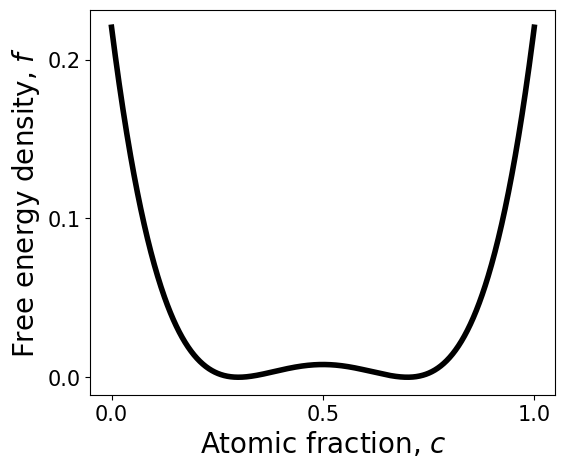

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

c_alpha = 0.3
c_beta = 0.7
rho_s = 5.

c = np.linspace(0, 1, 1000)
plt.figure(figsize=(6, 5))
plt.plot(c, rho_s * (c - c_alpha)**2 * (c - c_beta)**2, lw=4, color='k')
plt.xlabel("Atomic fraction, $c$", fontsize=20)
plt.ylabel("Free energy density, $f$", fontsize=20)
plt.xticks([0, 0.5, 1.0], fontsize=15)
plt.yticks([0, 0.1, 0.2], fontsize=15)
plt.show()

Because $c$ must obey a continuity equation -- the flux of $c$ is conserved -- the evolution of $c$ is given by the Cahn-Hilliard equation [[1][cahn1961spinodal]], which is derived from an Onsager force-flux relationship <span data-proofer-ignore>[[2][balluffi2005kinetics]]</span>:
$$
\frac{\partial c}{\partial t}=\nabla\cdot\Bigg\{M\nabla\left(\frac{\partial f_{chem}}{\partial c}-\kappa\nabla^{2}c\right)\Bigg\}
$$
where $M$ is the mobility of the solute. For simplicity, both the mobility and the interfacial energy are isotropic. We choose $c_{\alpha}=0.3$, $c_{\beta}=0.7$, $\varrho_{s}=5$, $M=5$, and $\kappa=2$. Because the interfacial energy, diffuse interface width, and free energy parameterization are coupled, we obtain the diffuse interface width of $l=7.071 \sqrt{\kappa/\varrho_s}=4.47$ units over which $c$ varies as  $0.348<c<0.652$, and an interfacial energy $\sigma=0.01508\sqrt{\kappa \varrho_s}$ [[3][cahn1958free]].

[cahn1961spinodal]: http://dx.doi.org/10.1016/0001-6160(61)90182-1
[balluffi2005kinetics]: https://dx.doi.org/10.1002/0471749311 
[cahn1958free]: http://dx.doi.org/10.1063/1.1744102

## Parameter values

<table width="200">
<tr>
<td> $c_{\alpha}$ </td>
<td> 0.3 </td>
</tr>
<tr>
<td> $c_{\beta}$ </td>
<td> 0.7 </td>
</tr>
<tr>
<td> $\varrho_{s}$ </td>
<td> 5 </td>
</tr>
<tr>
<td> $\kappa$ </td>
<td> 2 </td>
</tr>
<tr>
<td> $M$ </td>
<td> 5 </td>
</tr>
<tr>
<td> $\epsilon$ </td>
<td> 0.01 </td>
</tr>
<tr>
<td> $\epsilon_{\text{sphere}}$ </td>
<td> 0.05 </td>
</tr>
<tr>
<td> $c_0$ </td>
<td> 0.5 </td>
</tr>
</table>

## Domain geometries and boundary conditions

Several boundary conditions, initial conditions and computational domain geometries
are used to challenge different aspects of the numerical solver implementation. We test four combinations that are increasingly difficult to solve: two
with square computational domains, see (a) and (b), with side lengths of 200 units, one with a computational
domain in the shape of a "T," see (c), with a total height of 120 units, a total width of 100 units,
and horizontal and vertical section widths of 20 units, and one in which the computational domain is the surface of a sphere with a radius of r = 100 units, see (d). While most codes
readily handle rectilinear domains, a spherical domain may pose problems, such as having the
solution restricted to a two-dimensional curved surface. The coordinate systems and origins
are given in Fig. 2. Periodic boundary conditions are applied to one square domain, see (a), while
no-flux boundaries are applied to the other square domain, see (b), and the "T"-shaped domain, see (c). Periodic boundary conditions are commonly used with rectangular or rectangular prism domains
to simulate an infinite material, while no-flux boundary conditions may be used to simulate
an isolated piece of material or a mirror plane. As the computational domain is compact
for the spherical surface, no boundary conditions are specified for it. Note that the same
initial conditions are used for the square computational domains with no-flux, see (b), and periodic boundary conditions, see (a), such that when periodic boundary conditions
are applied, there is a discontinuity in the initial condition at the domain boundaries.

### (a) Square periodic

A 2D square domain with $L_x = L_y = 200$ and periodic boundary conditions.

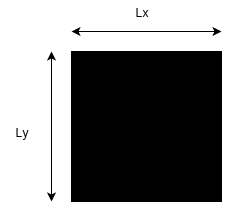

In [5]:
#PYTEST_VALIDATE_IGNORE_OUTPUT

from IPython.display import SVG
try:
    out = SVG(filename='../images/block1.svg')
except: 
    out = None
out

### (b) Square no-flux

A 2D square domain with $L_x = L_y = 200$ and no flux boundary conditions.

### (c) T-shape

A T-shaped region with zero flux boundary conditions and with dimensions, $a=b=100$  and  $c=d=20$.

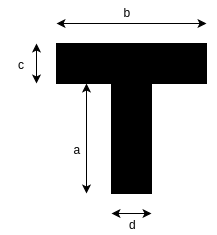

In [6]:
#PYTEST_VALIDATE_IGNORE_OUTPUT

from IPython.display import SVG
try:
    out = SVG(filename='../images/t-shape.svg')
except:
    out = None
out

### (d) Sphere

The domain is the surface of a sphere with radius 100.

## Initial conditions

The initial conditions for the first benchmark problem are chosen such that the average value of $c$ over the computational domain is approximately $0.5$.

### Initial conditions for (a), (b) and (c)

The initial value of $c$ for the square and "T" computational domains is
specified by 
$$
c\left(x,y\right) =
c_{0}+\epsilon\left[\cos\left(0.105x\right)\cos\left(0.11y\right)+\left[\cos\left(0.13x\right)\cos\left(0.087y\right)\right]^{2}\right.\nonumber \\
  \left.+\cos\left(0.025x-0.15y\right)\cos\left(0.07x-0.02y\right)\right],
$$
where $c_{0}=0.5$ and $\epsilon=0.01$.

#### Figure 2: initial $c$ for (a), (b) and (c)

In [7]:
#PYTEST_VALIDATE_IGNORE_OUTPUT

import numpy as np
from bokeh.plotting import figure, show, output_file, output_notebook, gridplot
from bokeh.models import FixedTicker
output_notebook()
from bokeh.palettes import brewer, RdBu11, Inferno256
from bokeh.models.mappers import LinearColorMapper
import matplotlib as plt
import matplotlib.cm as cm
import numpy as np
from bokeh.models import HoverTool, BoxSelectTool

def generate_colorbar(mapper, width, height, n_ticks):
    high, low = mapper.high, mapper.low
    pcb = figure(width=width,
                 height=height,
                 x_range=[0, 1],
                 y_range=[low, high],
                 min_border_right=10)
    pcb.image(image=[np.linspace(low, high, 400).reshape(400,1)],
              x=[0],
              y=[low],
              dw=[1],
              dh=[high - low],
              color_mapper=mapper)
    pcb.xaxis.major_label_text_color = None
    pcb.xaxis.major_tick_line_color = None
    pcb.xaxis.minor_tick_line_color = None
    pcb.yaxis[0].ticker=FixedTicker(ticks=np.linspace(low, high, n_ticks))
    return pcb

def generate_contour_plot(data, xrange, yrange, width, height, mapper):               
    p = figure(x_range=xrange, y_range=yrange, width=width, height=height, min_border_right=10)
    aa = p.image(image=[data],
                 x=xrange[0],
                 y=yrange[0],
                 dw=xrange[1] - xrange[0],
                 dh=yrange[1] - yrange[0],
                 color_mapper=mapper)
    return p


def get_data(xrange, yrange, data_func):
    N = 300
    xx, yy = np.meshgrid(np.linspace(xrange[0], xrange[1], N),
                         np.linspace(yrange[0], yrange[1], N))
    data = data_func(xx, yy)
    return xx, yy, data

def get_color_mapper(mpl_cm, high, low):
    colormap =cm.get_cmap(mpl_cm)
    bokehpalette = [plt.colors.rgb2hex(m) for m in colormap(np.arange(colormap.N))]
    mapper = LinearColorMapper(high=high,
                               low=low,
                               palette=bokehpalette)
    return mapper

def get_data_square(data_func):
    return get_data((0, 200), (0, 200), data_func)

def get_data_tshape(data_func):
    xx, yy, data = get_data((-40, 60), (0, 120), data_func)
    mask = ((xx < 0) | (xx > 20)) & (yy < 100)
    data[mask] = 0.5
    return xx, yy, data

def get_plot_grid(data_xy_func, high, low, n_ticks):
    mapper = get_color_mapper(cm.coolwarm, high, low)
    width, height = 300, 300

    all_plots = []
    for data_func in get_data_square, get_data_tshape:
        xx, yy, data = data_func(data_xy_func)
        contour_plot = generate_contour_plot(data,
                                             (xx.min(), xx.max()),
                                             (yy.min(), yy.max()),
                                             width,
                                             height,
                                             mapper)
        all_plots.append(contour_plot)
    
    all_plots.append(generate_colorbar(mapper, width // 4, height, n_ticks))
    return gridplot([all_plots]) 

def initial_concentration(x, y, epsilon=0.01, c_0=0.5):
    return c_0 + epsilon * (np.cos(0.105 * x) * np.cos(0.11 * y) + (np.cos(0.13 * x) * np.cos(0.087 * y))**2 \
                            + np.cos(0.025 * x - 0.15 * y) * np.cos(0.07 * x - 0.02 * y))

show(get_plot_grid(initial_concentration, 0.53, 0.47, 7),
     notebook_handle=True,
     browser=None);

ModuleNotFoundError: No module named 'bokeh'

### Initial conditions for (d)

The initial value of $c$ for the spherical computational domain is specified by
$$
c\left(\theta,\phi\right) = c_{0}+\epsilon_{sphere}\left[\cos\left(8\theta\right)\cos\left(15\phi\right)+\left(\cos\left(12\theta\right)\cos\left(10\phi\right)\right)^{2}\right.\nonumber \\
+\left.\cos\left(2.5\theta-1.5\phi\right)\cos\left(7\theta-2\phi\right)\right],
$$
where $\epsilon_{\text{sphere}}=0.05$, and $\theta$ and $\phi$ are the polar and azimuthal angles, respectively, in a spherical coordinate system. These angles are translated into a Cartesian system as $\theta=\cos^{-1}\left(z/r\right)$ and $\phi=\tan^{-1}\left(y/x\right)$ dependent upon angle.

#### Figure 3: initial $c$ for (d)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from skimage import measure
import matplotlib.pyplot as plt
from matplotlib.tri import Triangulation
from matplotlib import ticker
import matplotlib.cm as cm


def get_geometry(R=100., NN=60):
    X, Y, Z = np.mgrid[-R * 1.1:R * 1.1:NN * 1j, -R * 1.1:R * 1.1:NN * 1j, -R * 1.1:R * 1.1:NN * 1j]
    surf_eq = np.sqrt(X**2 + Y**2 + Z**2) - R
    coords, triangles = measure.marching_cubes(surf_eq, 0)
    rescale = lambda xx: (2 * R * 1.1 * (np.array(xx) / (NN - 1) - 0.5)).ravel()
    return tuple(rescale(xx) for xx in zip(*coords)) + (triangles,)

def triangle_data(data_func, geometry):
    x, y, z, triangles = geometry
    return data_func(x, y, z)[triangles].mean(1)

def get_mpl_triangulation(geometry):
    x, y, z, triangles = geometry
    return Triangulation(x, y, triangles)

def make_colorbar(fig, collec):
    colorbar = fig.colorbar(collec, shrink=0.3)
    colorbar.locator = ticker.MaxNLocator(nbins=5)
    colorbar.update_ticks()

def plot_3d_sphere(data_func):
    geometry = get_geometry()
    fig = plt.figure(figsize=(8, 8))
    ax = fig.gca(projection='3d')
    collec = ax.plot_trisurf(get_mpl_triangulation(geometry),
                             geometry[2],
                             cmap=cm.coolwarm,
                             linewidth=0.0,
                             edgecolor="none")  
    collec.set_array(triangle_data(data_func, geometry))
    collec.autoscale()
    ax.set_aspect('equal')
    ax.set_axis_off()
    make_colorbar(fig, collec)
    plt.show()

def conc_func(x, y, z, c_0=0.5, epsilon_sphere=0.05):
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arccos(z / r)
    phi = np.arctan(y / x)
    return c_0 + epsilon_sphere * (np.cos(8 * theta) * np.cos(15 * phi) \
                                   + (np.cos(12 * theta) * np.cos(10 * phi))**2 \
                                   + np.cos(2.5 * theta - 1.5 * phi) * np.cos(7 * theta - 2 * phi))

plot_3d_sphere(conc_func)

## Submission Guidelines

Please follow these [upload instructions](https://github.com/usnistgov/pfhub/blob/master/upload.md).

In addition to that specified, further data to upload can include a YouTube video, snapshots of the simulation at different times, or the field variable at each point in the entire domain at different times. This auxiliary data is not required, but will help others view your work.

### Part (a)

Part (a) requires running the simulation to equilibrium, and the following data should be collected.

- The free energy integrated over the whole domain, $\mathcal{F}$, at each timestep. 

  The free energy data should be recorded in a file named `free_energy_1a.csv`. This plain-text CSV file ([comma-separated values](https://en.wikipedia.org/wiki/Comma-separated_values)) must have the following format -- note the column headings and lack of spaces:

  ```
  time,free_energy
  0.00000000,319.0337102
  5.00000000,318.8273928
  ...
  10000.0000,40.81065093
  ...
  ```
 
- The composition field, $c$, at each grid point in the domain at the following times (aspirational):
  - 1,000
  - 10,000
  - 100,000
  - 1,000,000

  You may provide this data in whatever format you consider "most useful," e.g. a checkpoint file in the format native to your phase-field simulation framework, and the PFHub operations team will attempt to handle it correctly.
  Optionally, please consider also uploading a VTK ImageData file. If your mesh is unstructured or irregular, this will require appropriate interpolation prior to export. This can be accomplished using common scientific visualization software, e.g. using the PointVolumeInterpolator filter in ParaView.<sup>&#8225;</sup>

  The names of these data files should encode the time and problem, e.g.,
  `raw_data_1a.0001000.vti`, `raw_data_1a.0010000.vti`, `raw_data_1a.0100000.vti`, and `raw_data_1a.1000000.vti`.

<sup>&#8225;</sup>: Any mention of commercial products within NIST web pages is for information only; it does not imply recommendation or endorsement by NIST.

### Parts (b) through (d)

The same data as in Part (a) are required, stored in appropriately named files: please follow the same instructions, modifying "1a" with the appropriate letter ("1b", "1c", etc.).

## Results

Results from this benchmark problem are displayed on the [simulation result page]({{ site.baseurl }}/simulations) for different codes.

## Feedback

Feedback on this benchmark problem is appreciated. If you have questions, comments, or seek clarification, please contact the [CHiMaD phase field community]({{ site.baseurl }}/community/) through the [Gitter chat channel]({{ site.links.chat }}) or by [email]({{ site.baseurl }}/mailing_list/). If you found an error, please file an [issue on GitHub]({{ site.links.github }}/issues/new).